In [ ]:
from __future__ import print_function
import keras, glob
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta, SGD, Adam, RMSprop
from matplotlib import pyplot
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from keras.utils import to_categorical
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
!pip install opencv-python
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Préparation de train et test

def separate_corpus(path):
  labels = {"de":0, "en":1, "nl":2, "be":3, "ru":4, "uk":5}
  X = []
  Y = []
  for file in path:
    file_png = file.split('/')[-1]
    label = file_png.split('_')[2]
    x = cv2.imread(file, 0).astype(np.uint8)
    x = cv2.resize(x, (64, 64))
    X.append(x)
    y = labels[label]
    Y.append(y)
    # print(label)
  # print(len(X), len(Y))
  return X, Y


In [ ]:
# Normalisation des données : transformation des listes en tensors et convertir en float32

def normalization(nb_classes, img_rows, img_cols, x_train, x_test):
  x_train = np.array(x_train)
  x_test = np.array(x_test)
  x_train = x_train.reshape(-1, img_rows, img_cols, 1)
  x_test = x_test.reshape(-1, img_rows, img_cols, 1)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  print('x_train shape:', x_train.shape)
  print('x_test shape', x_test.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')
  return x_train, x_test


In [ ]:
# Convertissement les labels en vecteurs
def convert_y(y_train, y_test, nb_classes):
  # print(y_test)
  y_train = to_categorical(y_train, nb_classes)
  y_test = to_categorical(y_test, nb_classes)
  return y_train, y_test

In [ ]:
# Entrainement
def neuronal_network_CNN(nb_classes, x_train, y_train, x_test, y_test, batch_size, epochs):
  input_shape = [64, 64, 1]
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu')) # couche convolutif
  model.add(MaxPooling2D(pool_size=(2, 2))) # couche de pooling qui permet de reduire la taille de l'image
  model.add(Conv2D(32, (3, 3), activation='relu')) # couche convolutif
  model.add(MaxPooling2D(pool_size=(2, 2))) # couche de pooling qui permet de reduire la taille de l'image
  model.add(Dropout(0.25)) #couche qui permet de d'enlever des filtrer et les changer lors de chaque epoch
  model.add(Flatten()) #la matrice est mis à plat avec toute ses dimensions
  model.add(Dense(128, activation='softmax'))
  model.add(Dropout(0.5)) #0.5 == pourcentage
  model.add(Dense(nb_classes, activation='softmax')) #prise de décision
  opt = RMSprop(learning_rate=0.001)
  model.compile(loss=categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])
  history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
  print(history.history.keys())
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  return model, history

In [ ]:
# CNN model

# !ls /content/drive/MyDrive/Colab_Notebooks/CNN_M2/nasalite_light_corpus/train/nasal
path_corpus = glob.glob("/content/drive/MyDrive/spoken_lang_id/mfcc_all_500_phon/*.png")


In [ ]:
X, Y = separate_corpus(path_corpus)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
x_train, x_test = normalization(6, 64, 64, x_train, x_test)


x_train shape: (7208, 64, 64, 1)
x_test shape (1802, 64, 64, 1)
7208 train samples
1802 test samples


In [ ]:
# nb_classes = 2
# y_train = to_categorical(y_train, nb_classes)
# y_test = to_categorical(y_test, nb_classes)
y_train, y_test = convert_y(y_train, y_test, 6)


In [ ]:
model, history = neuronal_network_CNN(6, x_train, y_train, x_test, y_test, 128, epochs=30)

Epoch 1/30
57/57 [==============================] - 115s 2s/step - loss: 1.6944 - accuracy: 0.3470 - val_loss: 1.6090 - val_accuracy: 0.6282
Epoch 2/30
57/57 [==============================] - 108s 2s/step - loss: 1.5994 - accuracy: 0.4205 - val_loss: 1.5575 - val_accuracy: 0.6604
Epoch 3/30
57/57 [==============================] - 110s 2s/step - loss: 1.5548 - accuracy: 0.4291 - val_loss: 1.5094 - val_accuracy: 0.6609
Epoch 4/30
57/57 [==============================] - 108s 2s/step - loss: 1.5068 - accuracy: 0.4484 - val_loss: 1.4532 - val_accuracy: 0.7109
Epoch 5/30
57/57 [==============================] - 110s 2s/step - loss: 1.4662 - accuracy: 0.4464 - val_loss: 1.4018 - val_accuracy: 0.7103
Epoch 6/30
57/57 [==============================] - 109s 2s/step - loss: 1.4326 - accuracy: 0.4423 - val_loss: 1.3563 - val_accuracy: 0.7109
Epoch 7/30
57/57 [==============================] - 110s 2s/step - loss: 1.4052 - accuracy: 0.4517 - val_loss: 1.3098 - val_accuracy: 0.7198
Epoch 8/30
57

In [ ]:
# Prediction
y_predicted = model.predict(x_test)
print(x_test.shape)
y_pred = np.argmax(y_predicted, axis=1)
y_true = np.argmax(y_test, axis=1)
# y_predicted_df = df(y_predicted)
# # y_pred_df = pd.DataFrame(y_pred)
# print(y_predicted_df, type(y_predicted_df))
# maxima = np.array(y_test.argmax(axis=1))
# y_true = maxima.reshape(6135,1)
# y_true_df = df(y_true)
# concat_x_y = pd.concat([y_predicted_df, y_true_df], axis=1)


57/57 [==============================] - 7s 113ms/step
(1802, 64, 64, 1)


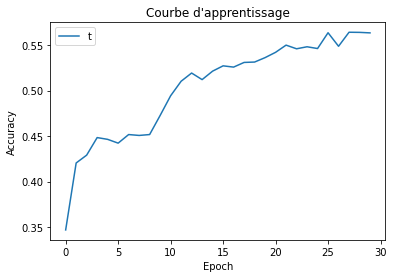

In [ ]:
# Learning graph

pyplot.plot(history.history['accuracy'])
pyplot.title("Courbe d'apprentissage")
pyplot.xlabel("Epoch")
pyplot.ylabel("Accuracy")
pyplot.legend("train")
pyplot.show()

In [ ]:
# Confusion matrix (matrix)

# y_true = np.argmax(y_true, axis=1)
# y_pred = np.argmax(y_predicted, axis=1)
matrix = confusion_matrix(y_true, y_pred)
print(matrix)


[[315   4   0   2   2   0]
 [134 110   3  12  32   6]
 [  0   0 282   1   0   0]
 [  1   0   5 276   2   9]
 [  0   5   2   8 287   1]
 [  0   0  42   1   0 260]]


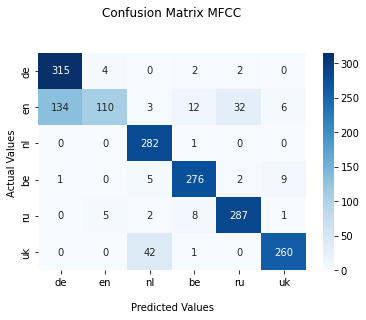

In [ ]:
# Confusion matrix (graph)

cm = sns.heatmap(matrix, annot=True, fmt="", cmap='Blues', xticklabels=["de", "en", "nl", "be", "ru", "uk"],
                 yticklabels=["de", "en", "nl", "be", "ru", "uk"])

cm.set_title('Confusion Matrix MFCC\n\n');
cm.set_xlabel('\nPredicted Values')
cm.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# cm.xaxis.set_ticklabels(["de", "en", "nl", "be", "ru", "uk"])
# cm.yaxis.set_ticklabels(["de", "en", "nl", "be", "ru", "uk"])

## Display the visualization of the Confusion Matrix.
pyplot.show()

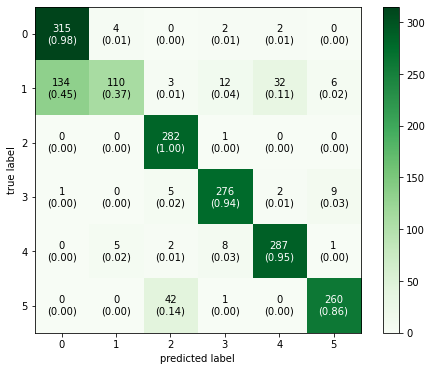

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
classes = ["de", "en", "nl", "be", "ru", "uk"]
fig, ax = plot_confusion_matrix(conf_mat=matrix,
                                # class_names=classes,
                                colorbar=True,
                                cmap='Greens',
                                show_normed=True,
                                figsize=(8, 6))